<a href="https://colab.research.google.com/github/fbuenovipn/Mineria_Datos/blob/main/Clase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Practica 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(200725)

In [ ]:
y = np.random.choice(range(300,1000),100)
y_predict = np.random.choice(range(300,1000),100)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_predict)

225.57

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predict,squared=False)

278.53658646576395

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y,y_predict)

0.4043940415433256

In [ ]:
#Practica 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import pylab
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
np.random.seed(200728)

In [ ]:
diabetes = pd.read_csv("/content/diabetes.csv")

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.rename(columns={column: column.lower() for column in diabetes.columns.values}, inplace=True)
diabetes.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


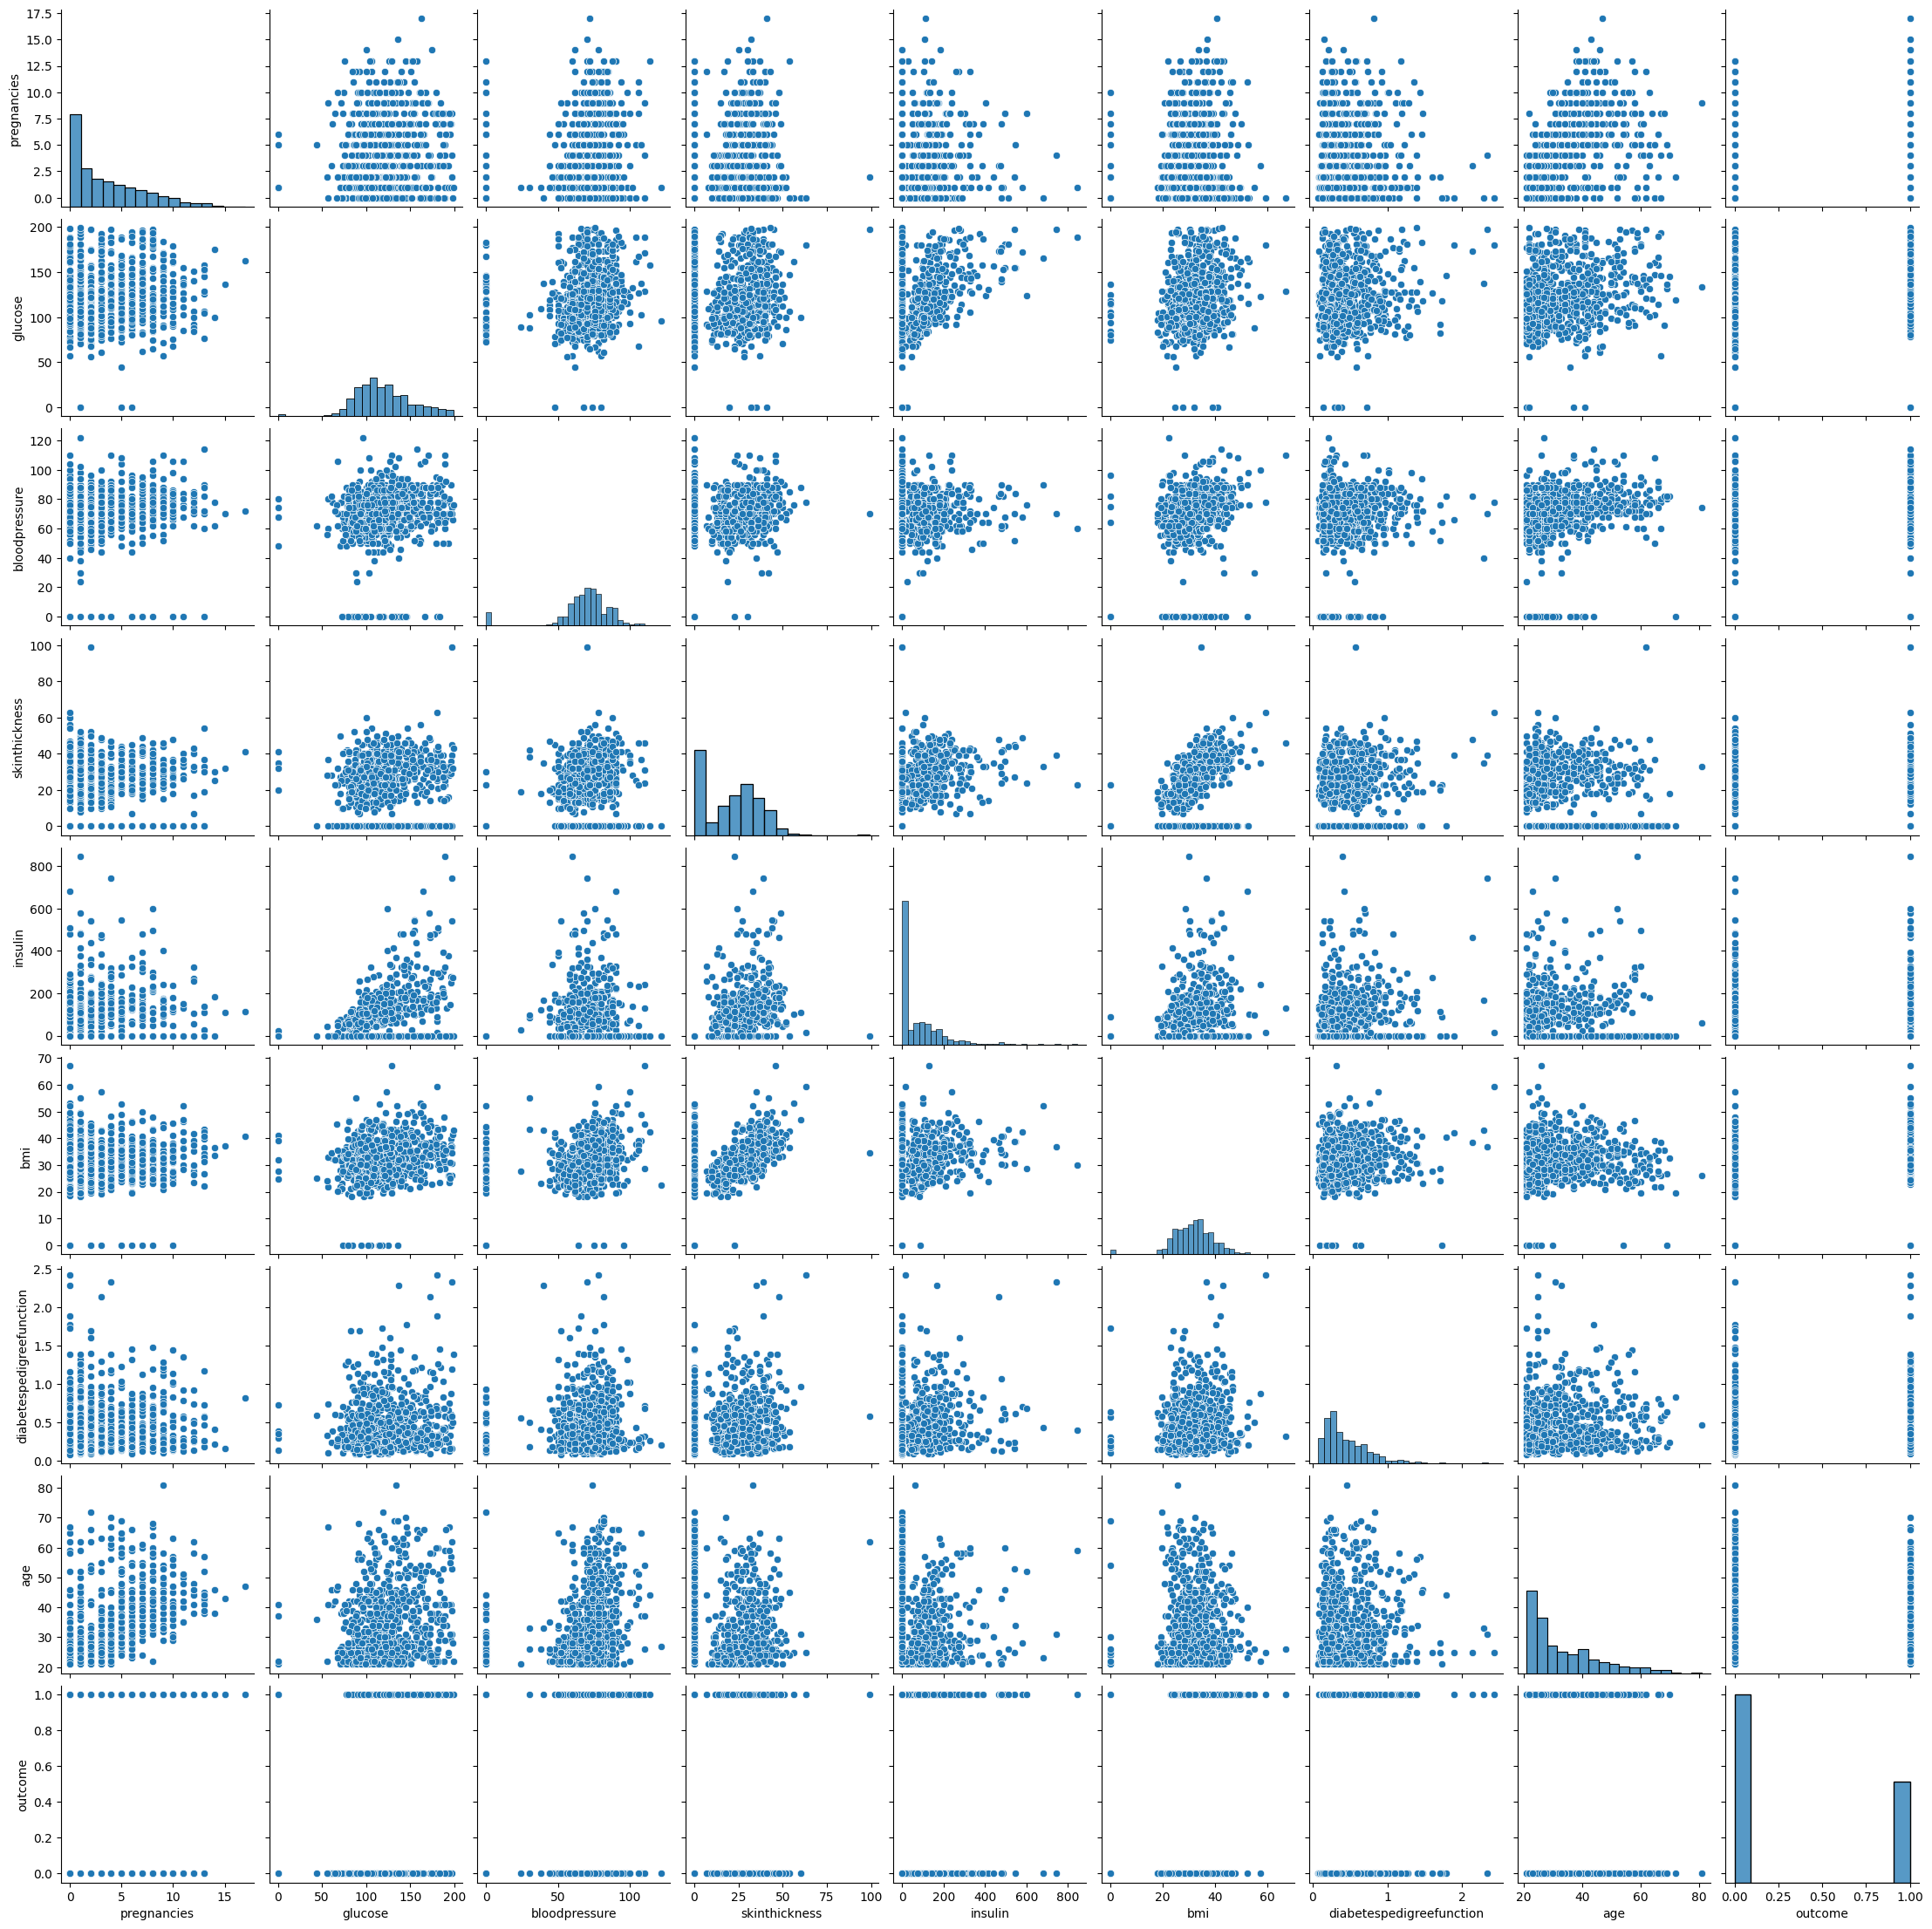

In [ ]:
sns.pairplot(diabetes)

In [ ]:
diabetes.columns.values

array(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness',
       'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype=object)

In [ ]:
X = diabetes[['bmi']]
y = diabetes[['glucose']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
print(X_train.shape, y_train.shape)

(537, 1) (537, 1)


In [ ]:
print(X_test.shape, y_test.shape)

(231, 1) (231, 1)


In [ ]:
lr = LinearRegression()

In [ ]:
m_lr = lr.fit(X_train, y_train)

In [ ]:
m_lr.coef_

array([[0.88262361]])

In [ ]:
m_lr.intercept_

array([92.68416999])

In [ ]:
predictions = m_lr.predict(X_test)

In [ ]:
predictions[:5]

array([[123.48773384],
       [111.30752808],
       [118.80982873],
       [127.81258951],
       [124.54688217]])

In [ ]:
mean_absolute_error(y_test, predictions)

24.45332477793409

In [ ]:
mean_squared_error(y_test, predictions, squared=False)

30.88959746514379

In [ ]:
residuals = y_test - predictions

In [ ]:
residuals.shape

(231, 1)

In [ ]:
residuals.head()

,glucose
373,-18.487734
134,-15.307528
711,7.190171
705,-47.812590
289,-16.546882


In [ ]:
a = predictions.reshape(residuals.shape[0],)

In [ ]:
a[:4]

array([123.48773384, 111.30752808, 118.80982873, 127.81258951])

In [ ]:
df_residuals = pd.DataFrame({'y_test': y_test['glucose'], 'predictions': a,
                             'residuals': residuals['glucose']})

<Axes: xlabel='predictions', ylabel='residuals'>

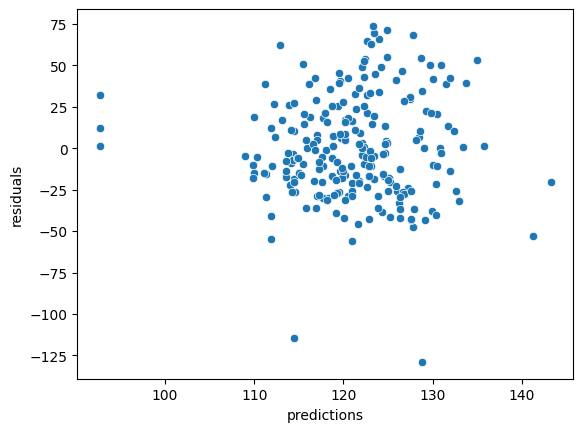

In [ ]:
sns.scatterplot(x='predictions', y='residuals', data=df_residuals)

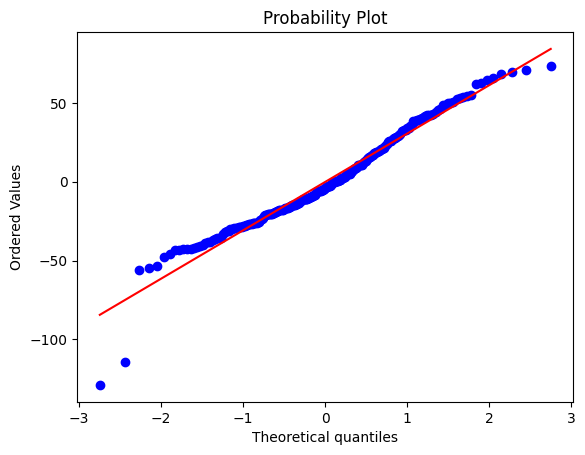

In [ ]:
stats.probplot(residuals.glucose, dist="norm", plot=pylab)
pylab.show()

In [ ]:
residuals.head()

,glucose
373,-18.487734
134,-15.307528
711,7.190171
705,-47.812590
289,-16.546882
